In [1]:
import pandas as pd

# Load the train.csv file
train_file_path = 'train.csv'
titanic_df = pd.read_csv(train_file_path)

# Display the first few rows of the dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Check for missing values
missing_values = titanic_df.isnull().sum()
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [3]:
# Fill missing 'Age' values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most frequent value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to too many missing values
titanic_df.drop(columns=['Cabin'], inplace=True)

In [4]:
# Convert 'Sex' and 'Embarked' to categorical types
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')

In [5]:
# Drop unnecessary columns
titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [6]:
# Summary statistics
print(titanic_df.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


C:\Users\smit1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


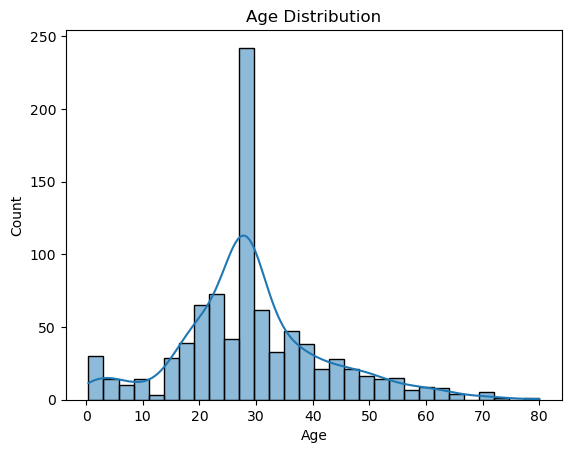

C:\Users\smit1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


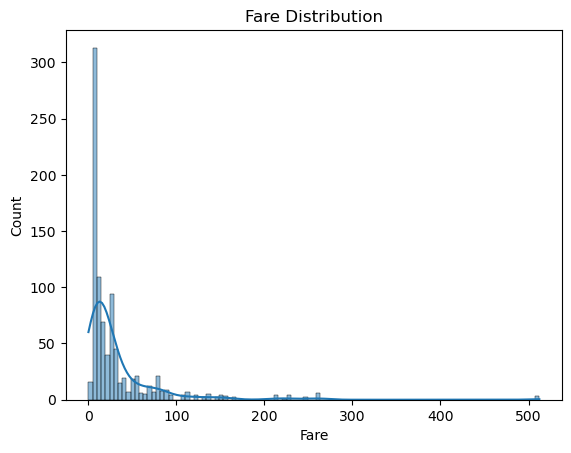

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of 'Age'
sns.histplot(titanic_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Distribution of 'Fare'
sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


C:\Users\smit1\AppData\Local\Temp\ipykernel_20080\1090787316.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
C:\Users\smit1\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


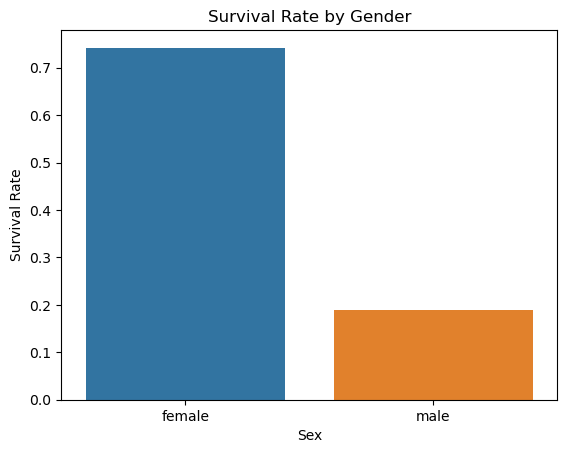

In [9]:
# Survival rate by gender
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()
print(gender_survival)

sns.barplot(x=gender_survival.index, y=gender_survival.values)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


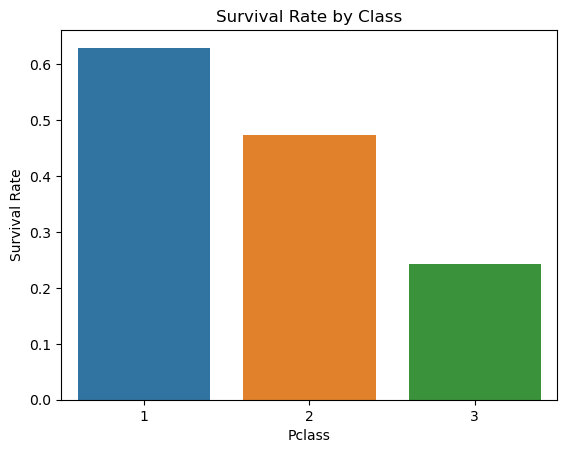

In [10]:
# Survival rate by class
class_survival = titanic_df.groupby('Pclass')['Survived'].mean()
print(class_survival)

sns.barplot(x=class_survival.index, y=class_survival.values)
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.show()


AgeGroup
Child          0.579710
Teenager       0.428571
Adult          0.353271
Middle-aged    0.400000
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\smit1\AppData\Local\Temp\ipykernel_20080\1397110151.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = titanic_df.groupby('AgeGroup')['Survived'].mean()
C:\Users\smit1\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


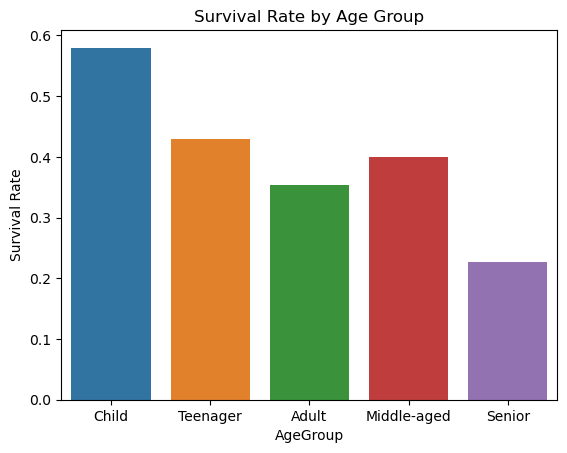

In [11]:
# Create age groups
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

# Survival rate by age group
agegroup_survival = titanic_df.groupby('AgeGroup')['Survived'].mean()
print(agegroup_survival)

sns.barplot(x=agegroup_survival.index, y=agegroup_survival.values)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()
